In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('segmentationData.csv')

# Implementation Part 2 (50%): Cell Body Segmentation Data.
## 1. Which classes exist? Are they (roughly) balanced?

In [41]:
df.describe()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,90.493405,320.336305,126.071679,189.052115,96.420171,140.701585,1.205859,0.895764,72.660125,1.454076,0.231957,0.246709,29.691933,0.932515
std,48.760000,214.023533,165.008379,158.956105,96.666924,146.634665,0.202522,0.076108,49.028338,0.252347,0.204030,0.183398,11.501550,0.885901
min,0.030876,150.000000,15.160400,1.000000,0.120000,0.563265,1.005831,0.510623,25.760355,1.000000,0.014286,0.013423,10.083350,-1.004442
25%,53.892205,193.000000,35.364158,44.998570,33.495693,40.679740,1.065236,0.856972,43.532759,1.290022,0.051171,0.107596,22.547068,0.403460
50%,90.588770,253.000000,62.343173,173.506300,67.431250,90.250000,1.148620,0.913262,55.810304,1.469231,0.179775,0.211886,27.642860,0.728311
75%,126.682013,362.500000,143.187800,279.289704,127.341651,191.170410,1.280514,0.955606,79.909902,1.647809,0.353311,0.337116,34.079173,1.225431
max,179.939323,2186.000000,1418.634831,989.509800,1205.512000,886.837500,2.900320,0.996499,442.773196,2.000000,0.968326,0.940367,126.993700,8.069013


In [42]:
df.dtypes

Class                       object
AngleCh1                   float64
AreaCh1                      int64
AvgIntenCh1                float64
AvgIntenCh2                float64
AvgIntenCh3                float64
AvgIntenCh4                float64
ConvexHullAreaRatioCh1     float64
ConvexHullPerimRatioCh1    float64
DiffIntenDensityCh1        float64
FiberAlign2Ch3             float64
IntenCoocMaxCh3            float64
IntenCoocMaxCh4            float64
NeighborMinDistCh1         float64
SkewIntenCh4               float64
dtype: object

In [43]:
color_df = df.groupby('Class').size().to_frame('count')
color_df['balance'] = color_df['count'] / color_df['count'].min()
color_df = color_df.sort_values('balance')
print(color_df)

       count   balance
Class                 
WS       719  1.000000
PS      1300  1.808067


The two classes WS an PS are not really balanced (imbalanced) with a ration of 1 : 1.8

## 2. Which noteworthy trends of features and relations between features as well as features and Class do you see?

In [44]:
df.corr()

C:\Users\Andi\AppData\Local\Temp\ipykernel_19216\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
AngleCh1,1.000000,-0.025281,-0.026470,0.022270,-0.008911,0.006931,-0.039384,0.032881,-0.040770,-0.011776,0.005589,0.009855,0.054098,0.028063
AreaCh1,-0.025281,1.000000,-0.039965,-0.163522,-0.139592,-0.084072,0.320712,-0.489944,-0.074990,-0.143195,0.038674,-0.015260,0.231252,0.075870
AvgIntenCh1,-0.026470,-0.039965,1.000000,0.516892,0.276232,0.394118,-0.238587,0.315972,0.942705,-0.054437,0.124660,-0.176615,-0.043701,-0.141429
AvgIntenCh2,0.022270,-0.163522,0.516892,1.000000,0.191390,0.599178,-0.448929,0.438276,0.485847,-0.066706,0.226547,-0.242853,-0.095988,-0.236903
AvgIntenCh3,-0.008911,-0.139592,0.276232,0.191390,1.000000,0.390760,0.007011,0.089375,0.441698,-0.020619,-0.326386,-0.134638,0.022199,-0.079956
AvgIntenCh4,0.006931,-0.084072,0.394118,0.599178,0.390760,1.000000,-0.259174,0.274304,0.386716,-0.062946,-0.165345,-0.477101,0.024899,-0.420889
ConvexHullAreaRatioCh1,-0.039384,0.320712,-0.238587,-0.448929,0.007011,-0.259174,1.000000,-0.716921,-0.193268,0.050550,-0.283276,0.216181,0.103121,0.274447
ConvexHullPerimRatioCh1,0.032881,-0.489944,0.315972,0.438276,0.089375,0.274304,-0.716921,1.000000,0.276235,0.027547,0.216211,-0.118948,-0.163567,-0.169147
DiffIntenDensityCh1,-0.040770,-0.074990,0.942705,0.485847,0.441698,0.386716,-0.193268,0.276235,1.000000,-0.046196,0.087012,-0.160157,-0.051174,-0.114899
FiberAlign2Ch3,-0.011776,-0.143195,-0.054437,-0.066706,-0.020619,-0.062946,0.050550,0.027547,-0.046196,1.000000,-0.019200,0.107769,-0.003185,0.060125


For example AvgIntenCh1 and DiffIntenDensityCh1 seem to have a high correlation.

C:\Users\Andi\AppData\Local\Temp\ipykernel_19216\3122669112.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


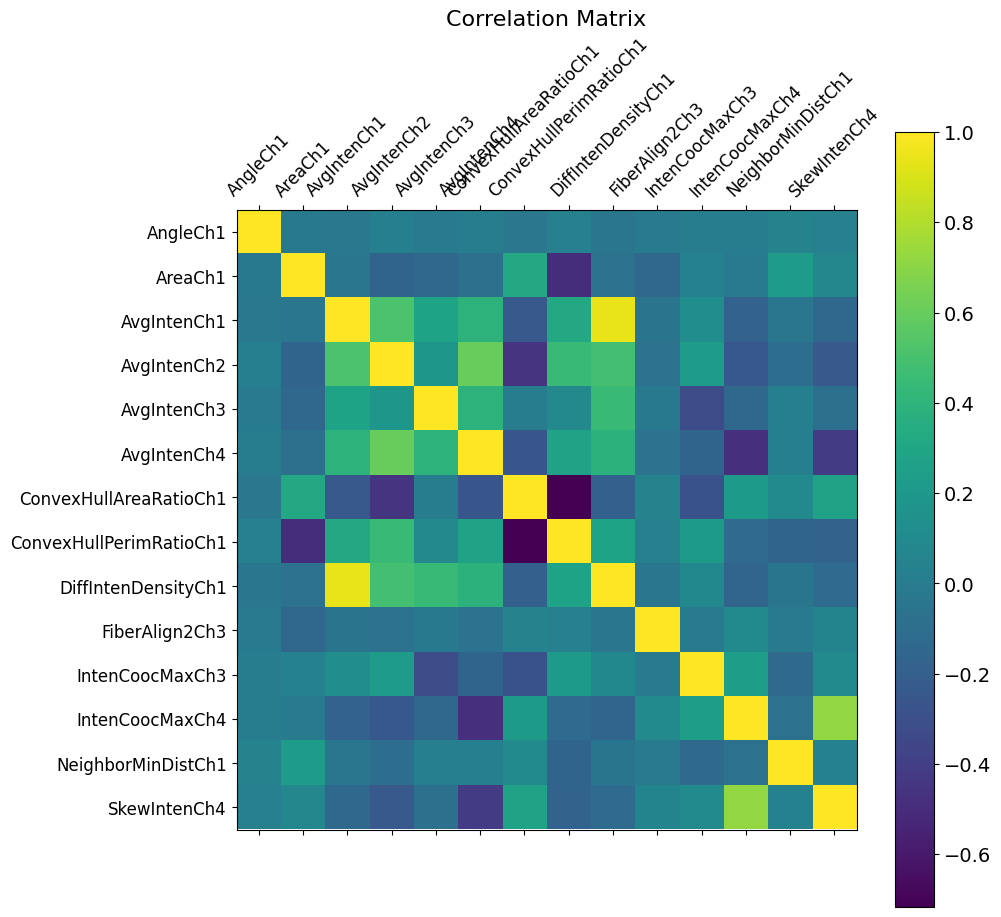

In [45]:
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

AngleCh1                      AxesSubplot(0.125,0.53;0.0945122x0.35)
AreaCh1                    AxesSubplot(0.238415,0.53;0.0945122x0.35)
AvgIntenCh1                AxesSubplot(0.351829,0.53;0.0945122x0.35)
AvgIntenCh2                AxesSubplot(0.465244,0.53;0.0945122x0.35)
AvgIntenCh3                AxesSubplot(0.578659,0.53;0.0945122x0.35)
AvgIntenCh4                AxesSubplot(0.692073,0.53;0.0945122x0.35)
ConvexHullAreaRatioCh1     AxesSubplot(0.805488,0.53;0.0945122x0.35)
ConvexHullPerimRatioCh1       AxesSubplot(0.125,0.11;0.0945122x0.35)
DiffIntenDensityCh1        AxesSubplot(0.238415,0.11;0.0945122x0.35)
FiberAlign2Ch3             AxesSubplot(0.351829,0.11;0.0945122x0.35)
IntenCoocMaxCh3            AxesSubplot(0.465244,0.11;0.0945122x0.35)
IntenCoocMaxCh4            AxesSubplot(0.578659,0.11;0.0945122x0.35)
NeighborMinDistCh1         AxesSubplot(0.692073,0.11;0.0945122x0.35)
SkewIntenCh4               AxesSubplot(0.805488,0.11;0.0945122x0.35)
dtype: object

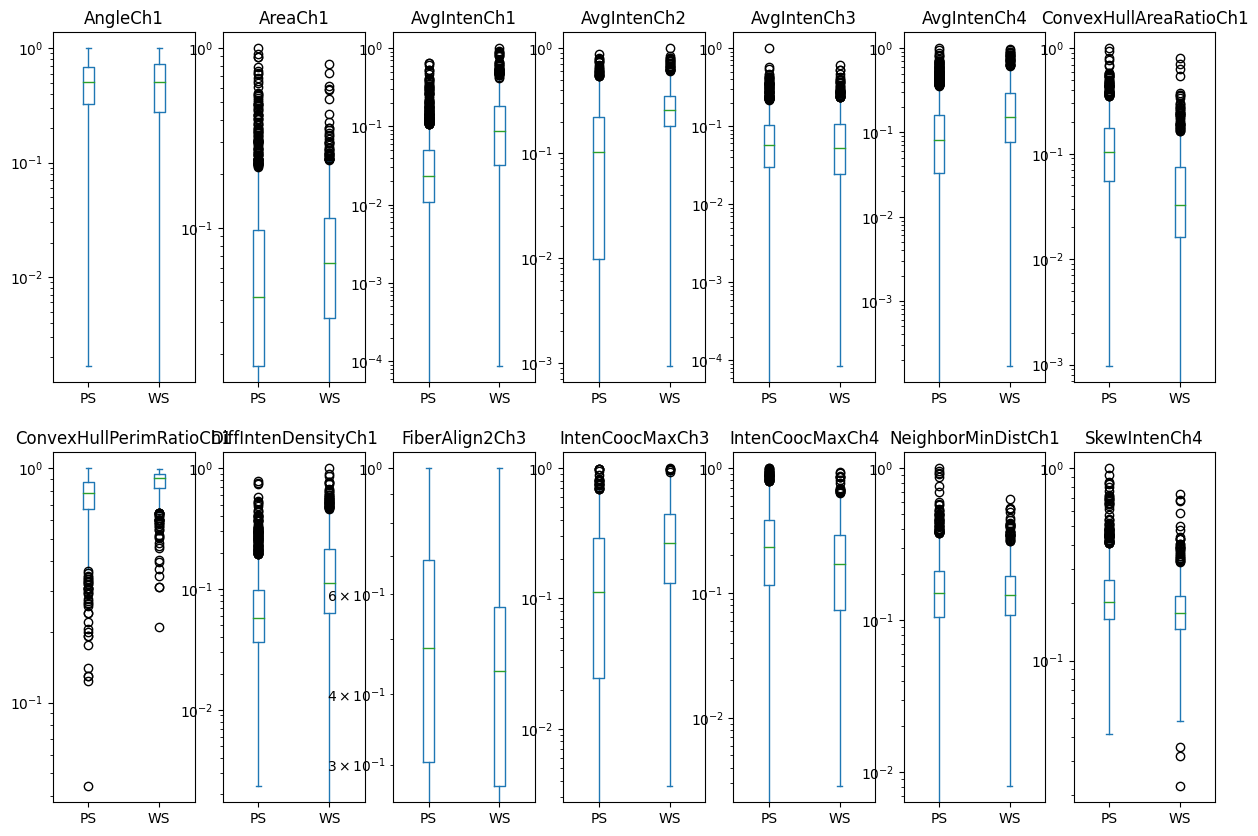

In [46]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
normalized_df = df.copy()
normalized_df[["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"]] = min_max_scaler.fit_transform(df[["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"]])

normalized_df.plot.box(by="Class", figsize=(15,10), logy=True, layout=(2,7))

In [47]:
df.groupby("Class").mean()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
Class,,,,,,,,,,,,,,
PS,90.619486,314.339231,78.342220,138.852531,96.309678,114.191873,1.255922,0.875728,60.748834,1.470619,0.189937,0.269191,30.063084,1.054383
WS,90.265441,331.179416,212.369728,279.816315,96.619950,188.632915,1.115343,0.931988,94.196536,1.424166,0.307932,0.206060,29.020866,0.712169


C:\Users\Andi\Documents\GitHub\fh-mc-ml\exercise\Ue01\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


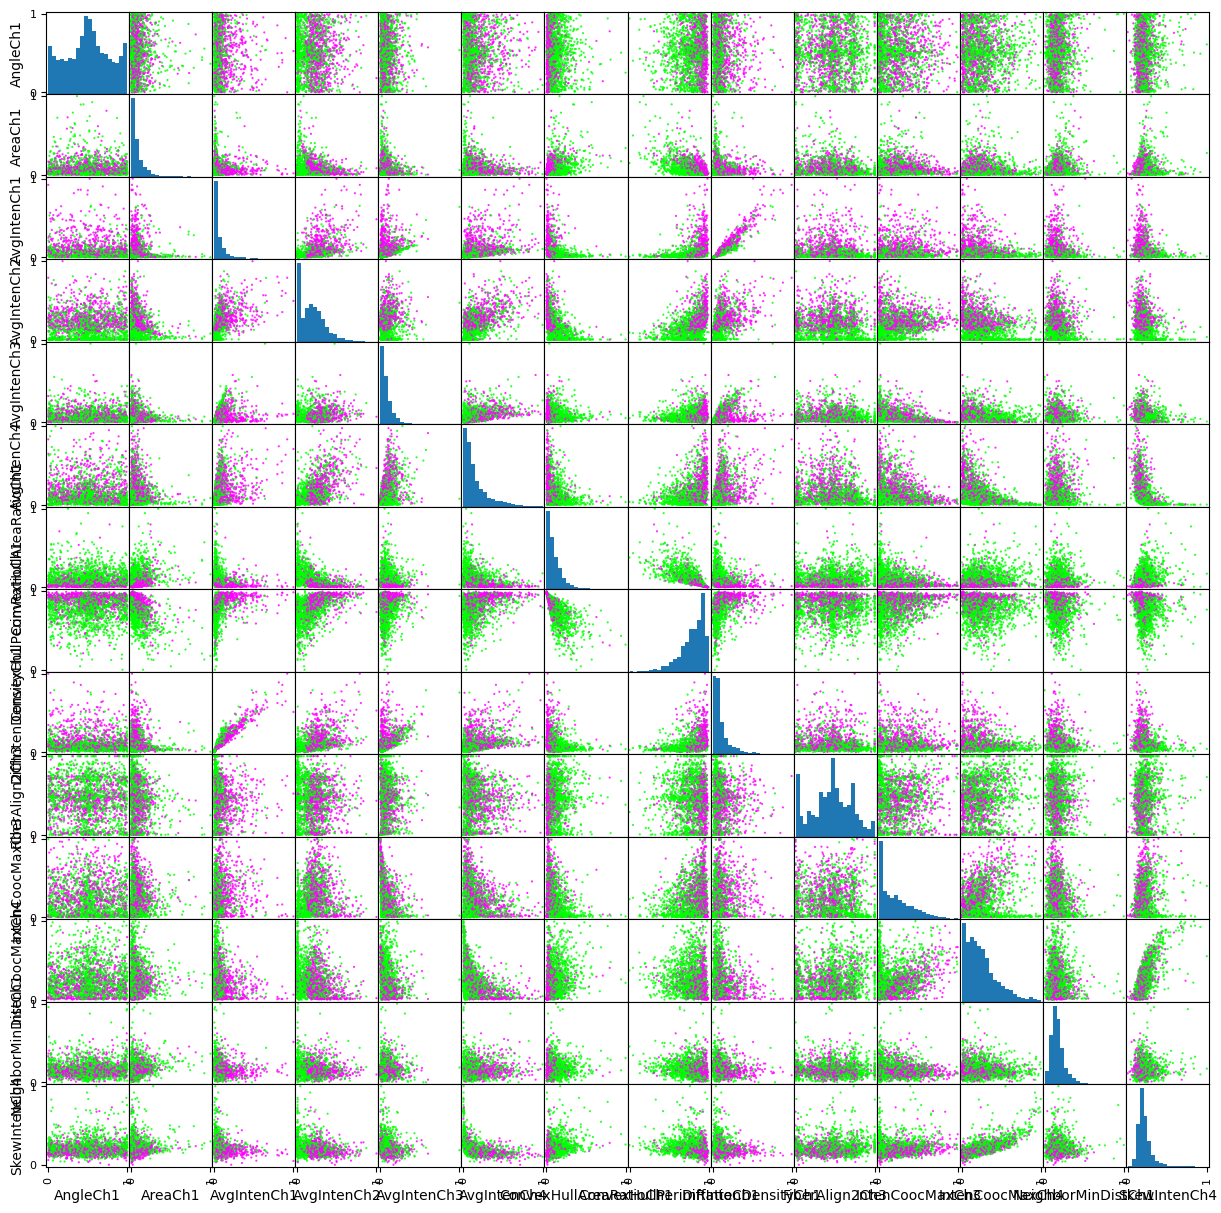

In [48]:
colums = ["AngleCh1", "AreaCh1", "AvgIntenCh1", "AvgIntenCh2", "AvgIntenCh3", "AvgIntenCh4", "ConvexHullAreaRatioCh1", "ConvexHullPerimRatioCh1", "DiffIntenDensityCh1", "FiberAlign2Ch3", "IntenCoocMaxCh3", "IntenCoocMaxCh4", "NeighborMinDistCh1", "SkewIntenCh4"]

test = lambda x: '#0f0' if x == "PS" else "#f0f"
vfunc = np.vectorize(test)
grr = pd.plotting.scatter_matrix(
    normalized_df[colums], c=vfunc(df.Class), figsize=(15,15), marker='.',
    hist_kwds={'bins':20}, s=10, alpha=.8, cmap='brg')

In [49]:
print('Mean:', round(df['AreaCh1'].mean(), 2))
print('Median:', round(df['AreaCh1'].median(), 2))
print('STD: ', round(df['AreaCh1'].std(), 2))
# the mad() function is deprecated
print('MAD: ', round((df['AreaCh1'] - df['AreaCh1'].mean()).abs().mean(), 2))
print('Q1:', df['AreaCh1'].quantile(0.25))
print('Q3:', df['AreaCh1'].quantile(0.75))
print('Inner quartile: ', df['AreaCh1'].quantile(0.75) - df['AreaCh1'].quantile(0.25))

Mean: 320.34
Median: 253.0
STD:  214.02
MAD:  137.58
Q1: 193.0
Q3: 362.5
Inner quartile:  169.5


## 3. If you would need to distinguish the classes with those features, which features would you choose, any why?

AvgIntenCh1
AvgIntenCh2
DiffIntenDensityCh1
ConvexHullAreaRatioCh1
ConvexHullPerimRatioCh1

When you look at the boxplot for these features the classes can be separated easily.